# Data Cleaning
Cleaning data to be able to geolocate it

In [2]:
import pandas as pd

path = "orders_sg.csv"
df = pd.read_csv(path)
df.head()

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days
3,3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days
4,4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days


In [27]:
import geohash
import os

def convert_geohash(file):
    df = pd.read_csv(file)
    try:
        df['geohash'].values.any()
    except KeyError:
        print("No geohash in file")
        return

    dir = os.getcwd()
    print(f"Processing {file}")
    name, ext = os.path.splitext(file)
    output_file = f'{dir}/{name}_clean.csv'  # Path to your output CSV file
    # Create empty lists to store the latitudes and longitudes
    latitudes = []
    longitudes = []

    # Iterate over each geohash in the DataFrame, decode it, and append the values
    for geohash_str in df['geohash']:
        lat, lon = geohash.decode(geohash_str)  # Decode the geohash
        latitudes.append(lat)
        longitudes.append(lon)

    # Add the latitude and longitude columns to the DataFrame
    df['latitude'] = latitudes
    df['longitude'] = longitudes

    # Save the updated DataFrame to a new CSV file
    df.to_csv(output_file, index=False)

In [29]:
files = ["orders_sg_test.csv",
		"orders_sg_train.csv",
		"orders_sg.csv",
		"products_sg.csv",
		"vendors_sg.csv"]
for file in files:
	convert_geohash(file)


Processing orders_sg_test.csv
Processing orders_sg_train.csv
Processing orders_sg.csv
No geohash in file
Processing vendors_sg.csv


In [3]:
output_file = 'geohash.csv'  # Path to your output CSV file

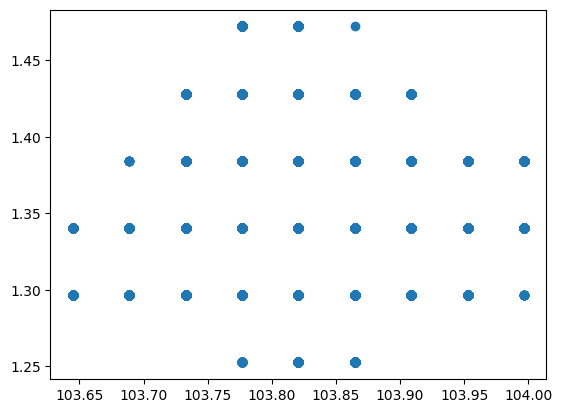

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=df['longitude'], y=df['latitude'])
plt.show()

# Visualising data with kepler.gl

In [2]:
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/sgoinfre/goinfre/Perso/jerlim/42asiahackathon/HACK_42SG/hack/dataenv/lib/python3.10/site-packages/IPython/core/formatters.py:370: FormatterWarning: text/html formatter returned invalid type <class 'bytes'> (expected <class 'str'>) for object: KeplerGl()
  warnings.warn(


KeplerGl()